In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [2]:
# Construct the transfer matrix at temperature 𝑇 with external field  𝐵

kB = 1.0
J = 1.0

def transf(T,B):
    beta = 1/(kB*T)
    return np.array([[np.exp(beta*(J+B)), np.exp(-1*beta*J)],
                   [np.exp(-1*beta*J), np.exp(beta*(J-B))]])

In [3]:
# Find the eivenvalues of the transfer matrix and compare to the exact results

# exact eigenvalues from det(transf - LI) = 0
def L1(T,B):
    beta = 1/(kB*T)
    return np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J)+np.exp(2*beta*J)*np.sinh(beta*B)**2)
def L2(T,B):
    beta = 1/(kB*T)
    return np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J)+np.exp(2*beta*J)*np.sinh(beta*B)**2)

r = 100
b = np.linspace(0,2,r)
t = np.zeros(r)
t[0:r] = b[0:r]**(-1)

/opt/anaconda3/envs/env1/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  


(0, 2)

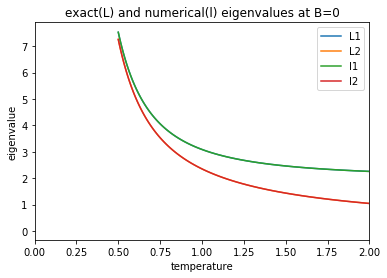

In [4]:
l1 = np.zeros(r)
l2 = np.zeros(r)
for i in range(0,r):
    l1[i] = np.linalg.eigvalsh(transf(t[i],0))[1]
    l2[i] = np.linalg.eigvalsh(transf(t[i],0))[0]

plt.plot(t,L1(t,0),t,L2(t,0),t,l1,t,l2)
plt.title("exact(L) and numerical(l) eigenvalues at B=0")
plt.xlabel("temperature")
plt.ylabel("eigenvalue")
plt.legend(('L1','L2','l1','l2'))
plt.xlim(xmin=0,xmax=2)

(0, 2)

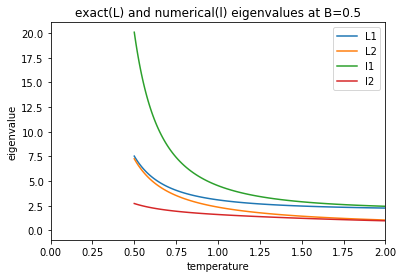

In [5]:
l1 = np.zeros(r)
l2 = np.zeros(r)
for i in range(0,r):
    l1[i] = np.linalg.eigvalsh(transf(t[i],0.5))[1]
    l2[i] = np.linalg.eigvalsh(transf(t[i],0.5))[0]

plt.plot(t,L1(t,0),t,L2(t,0),t,l1,t,l2)
plt.title("exact(L) and numerical(l) eigenvalues at B=0.5")
plt.xlabel("temperature")
plt.ylabel("eigenvalue")
plt.legend(('L1','L2','l1','l2'))
plt.xlim(xmin=0,xmax=2)

(0, 2)

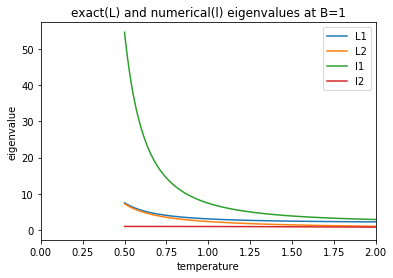

In [6]:
l1 = np.zeros(r)
l2 = np.zeros(r)
for i in range(0,r):
    l1[i] = np.linalg.eigvalsh(transf(t[i],1))[1]
    l2[i] = np.linalg.eigvalsh(transf(t[i],1))[0]

plt.plot(t,L1(t,0),t,L2(t,0),t,l1,t,l2)
plt.title("exact(L) and numerical(l) eigenvalues at B=1")
plt.xlabel("temperature")
plt.ylabel("eigenvalue")
plt.legend(('L1','L2','l1','l2'))
plt.xlim(xmin=0,xmax=2)

In [7]:
# Evaluate the partition function  𝑍  at different system size  𝑁  and  𝑇 ,  𝐵 . Compare to the exact results.

def partition(T,B,N):
    Tmatrix = transf(T,B)
    t = np.array([[1,0],[0,1]])
    for i in range(0,N):
        t = t@Tmatrix
    return np.trace(t)

def Zexact(T,B,N):
    return np.power(L1(T,B),N) + np.power(L2(T,B),N)

r = 100
b = np.linspace(1,2,r)
t = np.zeros(r)
t[0:r] = b[0:r]**(-1)

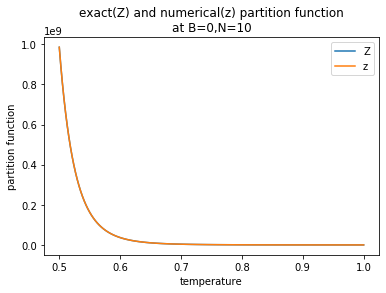

In [8]:
Z = np.zeros(r)
z = np.zeros(r)

for i in range(0,r):
    Z[i] = Zexact(t[i],0,10)
    z[i] = partition(t[i],0,10)

plt.plot(t,Z,t,z)
plt.title("exact(Z) and numerical(z) partition function\nat B=0,N=10")
plt.xlabel("temperature")
plt.ylabel("partition function")
plt.legend(('Z','z'))

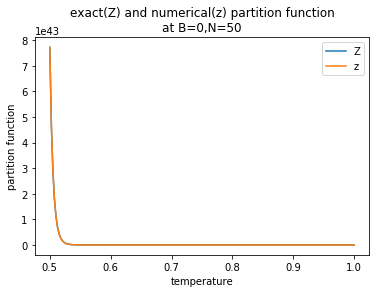

In [9]:
Z = np.zeros(r)
z = np.zeros(r)

for i in range(0,r):
    Z[i] = Zexact(t[i],0,50)
    z[i] = partition(t[i],0,50)

plt.plot(t,Z,t,z)
plt.title("exact(Z) and numerical(z) partition function\nat B=0,N=50")
plt.xlabel("temperature")
plt.ylabel("partition function")
plt.legend(('Z','z'))

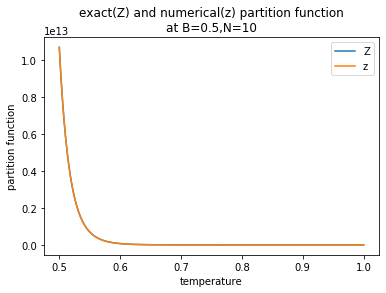

In [10]:
Z = np.zeros(r)
z = np.zeros(r)

for i in range(0,r):
    Z[i] = Zexact(t[i],0.5,10)
    z[i] = partition(t[i],0.5,10)

plt.plot(t,Z,t,z)
plt.title("exact(Z) and numerical(z) partition function\nat B=0.5,N=10")
plt.xlabel("temperature")
plt.ylabel("partition function")
plt.legend(('Z','z'))

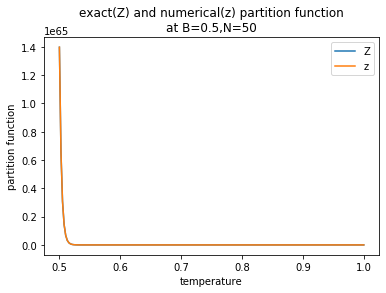

In [11]:
Z = np.zeros(r)
z = np.zeros(r)

for i in range(0,r):
    Z[i] = Zexact(t[i],0.5,50)
    z[i] = partition(t[i],0.5,50)

plt.plot(t,Z,t,z)
plt.title("exact(Z) and numerical(z) partition function\nat B=0.5,N=50")
plt.xlabel("temperature")
plt.ylabel("partition function")
plt.legend(('Z','z'))

In [12]:
# For a fixed  𝑁 ,  𝑇 ,  𝐵 , evaluate  ⟨𝑆0𝑆𝑗⟩  where  𝑗=0,1,⋯𝑁 .

def s0sj(T,B,N,j):
    Tmatrix = transf(T,B)
    Tz = np.array([[1,0],[0,-1]])
    t = Tz
    for i in range(0,N):
        if i == j:
            t = t@Tz@Tmatrix
        else:
            t = t@Tmatrix
    return np.trace(t)

T = 0.5
B = 0
N = 50

print("T = %f, B = %f, N = %f" %(T,B,N))

Z = partition(T,B,N)
for j in range(0,N):
    print(s0sj(T,B,N,j)/Z)

T = 0.500000, B = 0.000000, N = 50.000000
1.0
0.9741432356157533
0.9495940644792682
0.9263195342184027
0.9042884034124916
0.8834710996569551
0.8638396798682368
0.8453677927757856
0.828030643550716
0.8118049605236947
0.7966689639473606
0.7826023367613487
0.7695861973206863
0.7576030740509468
0.7466368819961374
0.736672901227853
0.727697757086705
0.7196994022295011
0.7126671004580901
0.7065914123081563
0.701464182378615
0.6972785283846116
0.6940288319194287
0.6917107309128898
0.6903211137761507
0.6898581152250138
0.6903211137761514
0.69171073091289
0.6940288319194288
0.6972785283846126
0.7014641823786155
0.7065914123081568
0.7126671004580903
0.7196994022295007
0.7276977570867054
0.7366729012278536
0.7466368819961378
0.7576030740509467
0.7695861973206862
0.7826023367613484
0.7966689639473606
0.8118049605236947
0.8280306435507155
0.8453677927757856
0.8638396798682375
0.8834710996569552
0.9042884034124921
0.9263195342184031
0.9495940644792682
0.9741432356157542


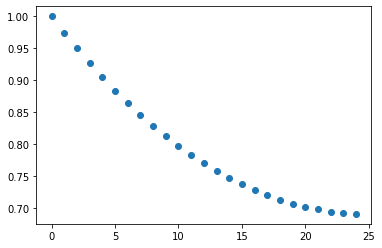

In [13]:
# Plot  ⟨𝑆0𝑆𝑗⟩  up to  𝑗=𝑁/2  and show that it decays exponentially.

n = int(N/2)
x = np.zeros(n)
y = np.zeros(n)

def corr(T,B,N):
    Z = partition(T,B,N)
    for j in range(0,n):
        x[j] = j
        y[j] = s0sj(T,B,N,j)/Z

corr(T,B,N)
fig, ax = plt.subplots()
ax.plot(x,y,'o')

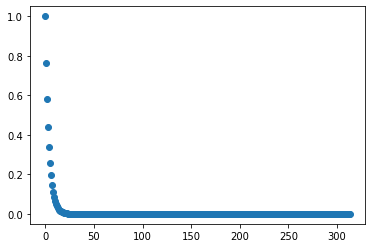

In [14]:
# Please try several  𝑁 ,  𝑇 ,  𝐵 . What is the largest  𝑁  you can go?

T = 1
B = 0
N = 629

n = int(N/2)
x = np.zeros(n)
y = np.zeros(n)

corr(T,B,N)
fig, ax = plt.subplots()
ax.plot(x,y,'o')

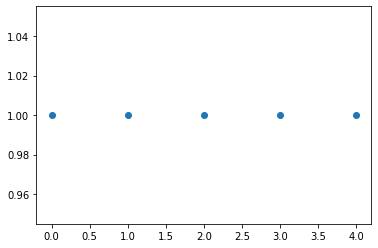

In [15]:
# What is the lowest  𝑇  you can go?

T = 0.03
B = 1
N = 10

n = int(N/2)
x = np.zeros(n)
y = np.zeros(n)

corr(T,B,N)
fig, ax = plt.subplots()
ax.plot(x,y,'o')